# Install

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 4
core id		: 0
cpu cores	: 2
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.5MB 4.1MB/s 
     |████████████████████████████████| 3.3MB 34.7MB/s 
     |████████████████████████████████| 901kB 43.1MB/s 


In [ ]:
import re
import time
import pandas as pd
import numpy as np
import pickle
import tensorflow as tf
import torch
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.utils import shuffle
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from transformers import ElectraTokenizer, TFElectraForSequenceClassification
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from transformers import AutoTokenizer, AutoModel, DistilBertModel
import time
import timeit
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from transformers import ElectraTokenizer, ElectraForSequenceClassification
import torch
m =ElectraForSequenceClassification.from_pretrained('google/electra-small-discriminator')

Some weights of the model checkpoint at google/electra-small-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-small-discriminator and are newly initialized: ['classifier

In [ ]:
m

ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(30522, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (embeddings_project): Linear(in_features=128, out_features=256, bias=True)
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0): ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=256, out_features=256, bias=True)
              (key): Linear(in_features=256, out_features=256, bias=True)
              (value): Linear(in_features=256, out_features=256, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_

# Load Model

## Load Tokenizer & BERT based Model

# Detector

In [ ]:
last_implement=[]
reuslt_benchmark={}

def processing_time(func): 
  def wrapper_fn(*args, **kwargs): 
    start_time = time.time() 
    func_result = func(*args, **kwargs) 
    end_time = time.time()-start_time
    # print("Processing time : %.2f ms" % ((end_time)*1000)) 
    last_implement.append(end_time)
    return func_result 
  return wrapper_fn

def benchmark(ChatStacker,CSname):
  chatting = ChatStacker
  global last_implement
  last_implement=[]
  print(len(last_implement))
  for _ in range(5000):
    chatting.chat("Hello, My Name is Changwoo. Hello, Mind Logic. Hello, CodeStates")
  print(len(last_implement),"개")
  print('평균 : ', 1000*sum(last_implement)/len(last_implement))
  reuslt_benchmark[CSname]=last_implement

## Logistic with SqueezeBERT Embedding

In [ ]:
benchmark_list = []

In [ ]:
# SQUEEZE EMB
tokenizer_squeezebert = AutoTokenizer.from_pretrained("squeezebert/squeezebert-uncased")
model_squeezebert = AutoModel.from_pretrained("squeezebert/squeezebert-uncased")

Some weights of the model checkpoint at squeezebert/squeezebert-uncased were not used when initializing SqueezeBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing SqueezeBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SqueezeBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
class ChatStacker:

  def __init__(self,maximum_len=1000,maximum_sentence=2):
    self.maximum_len = maximum_len
    self.maximum_sentence = maximum_sentence
    self.chat_list = []
    self.model = pickle.load(open("/content/drive/MyDrive/HateSpeech/Weight/ML/LogisticRegression_squeeze.sav", 'rb'))

  def preprocess(self, text):
    # URL 제거
    text = re.sub('http\S+', '', text).strip()
    text = re.sub('^!!+', '', text).strip()
    text = re.sub('^(rt)', '', text).strip()
    # 멘션 제거
    text = re.sub('@\S+', '', text).strip()
    # 해쉬 및 특수문자 제거
    delete_e = re.compile("[^a-zA-Z0-9\!\?\$\%\' ]")
    text = delete_e.sub("",text).strip()
    text = text.lower()
    return text

  def chat_stack(self,last_chat):
    self.chat_list.append(last_chat)
    if sum([len(chat) for chat in self.chat_list])>self.maximum_len:
      while sum([len(chat) for chat in self.chat_list])>self.maximum_len:
        self.chat_list.pop(0)
    if len(self.chat_list)>self.maximum_sentence:
      while len(self.chat_list)>self.maximum_sentence:
        self.chat_list.pop(0)

  def chat_sum(self):
    text = ''
    for t in self.chat_list[:-1]:
      text += t
      text += ' [SEP] '
    text += self.chat_list[-1]
    return text

  @processing_time
  def detecting(self):
    #토크나이징
    input_text = tokenizer_squeezebert([self.chat_sum()], truncation=True, padding=True)
    #임베딩
    with torch.no_grad():
        input_text = model_squeezebert(torch.tensor(np.array(input_text['input_ids'])))[0][:,0,:]
    #인퍼런스
    result = self.model.predict(input_text)
    #리턴 01
    return result

  def chat(self,text):
    text = text
    text = self.preprocess(text)
    self.chat_stack(text)
    result = self.detecting()
    return result



In [ ]:
import time
timeit.repeat('benchmark(ChatStacker(1000,2))', setup="from __main__ import benchmark, ChatStacker", number=10, repeat=10)
start = time.time()
benchmark_list.append((timeit.repeat('benchmark(ChatStacker(1000,2))', setup="from __main__ import benchmark, ChatStacker", number=10, repeat=500),"Logistic+Squeeze(2)"))
benchmark_list.append((timeit.repeat('benchmark(ChatStacker(1000,5))', setup="from __main__ import benchmark, ChatStacker", number=10, repeat=500),"Logistic+Squeeze(5)"))
print(time.time()-start)

492.6747269630432


In [ ]:
benchmark(ChatStacker(1000,2),"Logistic+Squeeze(2)")
benchmark(ChatStacker(1000,5),"Logistic+Squeeze(5)")
for k in reuslt_benchmark.keys():
  print(len(reuslt_benchmark[k]))

0
5000 개
평균 :  69.45744972229004
0
5000 개
평균 :  130.82553992271423
5000
5000


## Logistic with DistilBERT Embedding

In [ ]:

# DISTIL EMB
tokenizer_distilbert_emb = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model_distilbert_emb = DistilBertModel.from_pretrained('distilbert-base-uncased')


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
class ChatStacker:

  def __init__(self,maximum_len=1000,maximum_sentence=2):
    self.maximum_len = maximum_len
    self.maximum_sentence = maximum_sentence
    self.chat_list = []
    self.model = pickle.load(open("/content/drive/MyDrive/HateSpeech/Weight/ML/LogisticRegression_distil.sav", 'rb'))

  def preprocess(self, text):
    # URL 제거
    text = re.sub('http\S+', '', text).strip()
    text = re.sub('^!!+', '', text).strip()
    text = re.sub('^(rt)', '', text).strip()
    # 멘션 제거
    text = re.sub('@\S+', '', text).strip()
    # 해쉬 및 특수문자 제거
    delete_e = re.compile("[^a-zA-Z0-9\!\?\$\%\' ]")
    text = delete_e.sub("",text).strip()
    text = text.lower()
    return text

  def chat_stack(self,last_chat):
    self.chat_list.append(last_chat)
    if sum([len(chat) for chat in self.chat_list])>self.maximum_len:
      while sum([len(chat) for chat in self.chat_list])>self.maximum_len:
        self.chat_list.pop(0)
    if len(self.chat_list)>self.maximum_sentence:
      while len(self.chat_list)>self.maximum_sentence:
        self.chat_list.pop(0)

  def chat_sum(self):
    text = ''
    for t in self.chat_list[:-1]:
      text += t
      text += ' [SEP] '
    text += self.chat_list[-1]
    return text

  def detecting(self):
    #토크나이징
    input_text = tokenizer_distilbert_emb([self.chat_sum()], truncation=True, padding=True)
    #임베딩
    with torch.no_grad():
        input_text = model_distilbert_emb(torch.tensor(np.array(input_text['input_ids'])))[0][:,0,:]
    #인퍼런스
    result = self.model.predict(input_text)
    #리턴 01
    return result

  @processing_time
  def chat(self,text):
    text = text
    text = self.preprocess(text)
    self.chat_stack(text)
    result = self.detecting()
    return result


In [ ]:
benchmark(ChatStacker(1000,2),"Logistic+Distil(2)")
benchmark(ChatStacker(1000,5),"Logistic+Distil(5)")
for k in reuslt_benchmark.keys():
  print(len(reuslt_benchmark[k]))

0
5000 개
평균 :  51.79616904258728
0
5000 개
평균 :  93.43320260047912
5000
5000
5000
5000


## Logistic&LGBM with Electra Embedding

In [ ]:
# ELECTRA
tokenizer_electra = ElectraTokenizer.from_pretrained('google/electra-small-discriminator')
model_electra = TFElectraForSequenceClassification.from_pretrained('google/electra-small-discriminator')

Some layers from the model checkpoint at google/electra-small-discriminator were not used when initializing TFElectraForSequenceClassification: ['discriminator_predictions']
- This IS expected if you are initializing TFElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-small-discriminator and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model_electra.load_weights("/content/drive/MyDrive/HateSpeech/Weight/ELECTRA")
model_electra = tf.keras.Sequential(model_electra.layers[:-1])

In [ ]:
class ChatStacker:

  def __init__(self,maximum_len=1000,maximum_sentence=2):
    self.maximum_len = maximum_len
    self.maximum_sentence = maximum_sentence
    self.chat_list = []
    self.model = pickle.load(open("/content/drive/MyDrive/HateSpeech/Weight/ML/LogisticRegression_electra.sav", 'rb'))

  def preprocess(self, text):
    # URL 제거
    text = re.sub('http\S+', '', text).strip()
    text = re.sub('^!!+', '', text).strip()
    text = re.sub('^(rt)', '', text).strip()
    # 멘션 제거
    text = re.sub('@\S+', '', text).strip()
    # 해쉬 및 특수문자 제거
    delete_e = re.compile("[^a-zA-Z0-9\!\?\$\%\' ]")
    text = delete_e.sub("",text).strip()
    text = text.lower()
    return text

  def chat_stack(self,last_chat):
    self.chat_list.append(last_chat)
    if sum([len(chat) for chat in self.chat_list])>self.maximum_len:
      while sum([len(chat) for chat in self.chat_list])>self.maximum_len:
        self.chat_list.pop(0)
    if len(self.chat_list)>self.maximum_sentence:
      while len(self.chat_list)>self.maximum_sentence:
        self.chat_list.pop(0)

  def chat_sum(self):
    text = ''
    for t in self.chat_list[:-1]:
      text += t
      text += ' [SEP] '
    text += self.chat_list[-1]
    return text

  def detecting(self):
    #토크나이징
    input_text = tokenizer_electra([self.chat_sum()], truncation=True, padding=True)
    input_text = tf.data.Dataset.from_tensor_slices((dict(input_text)))
    input_text = model_electra.predict(input_text).last_hidden_state[:,0,:]
    result = self.model.predict(input_text)
    #리턴 01
    return result

  @processing_time
  def chat(self,text):
    text = text
    text = self.preprocess(text)
    self.chat_stack(text)
    result = self.detecting()
    return result
benchmark(ChatStacker(1000,2),"Logistic_ELECTRA(2)")
benchmark(ChatStacker(1000,5),"Logistic_ELECTRA(5)")
for k in reuslt_benchmark.keys():
  print(len(reuslt_benchmark[k]))
  # Processing time : 44.44 ms

0
before {'input_ids': [[101, 7592, 2026, 2171, 2003, 11132, 12155, 2080, 7592, 2568, 7961, 7592, 9537, 12259, 2015, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}
after <TensorSliceDataset shapes: {input_ids: (16,), token_type_ids: (16,), attention_mask: (16,)}, types: {input_ids: tf.int32, token_type_ids: tf.int32, attention_mask: tf.int32}>
Consider rewriting this model with the Functional API.


KeyboardInterrupt: ignored

In [ ]:
class ChatStacker:

  def __init__(self,maximum_len=1000,maximum_sentence=2):
    self.maximum_len = maximum_len
    self.maximum_sentence = maximum_sentence
    self.chat_list = []
    self.model = pickle.load(open("/content/drive/MyDrive/HateSpeech/Weight/ML/LGBMClassifier_electra.sav", 'rb'))

  def preprocess(self, text):
    # URL 제거
    text = re.sub('http\S+', '', text).strip()
    text = re.sub('^!!+', '', text).strip()
    text = re.sub('^(rt)', '', text).strip()
    # 멘션 제거
    text = re.sub('@\S+', '', text).strip()
    # 해쉬 및 특수문자 제거
    delete_e = re.compile("[^a-zA-Z0-9\!\?\$\%\' ]")
    text = delete_e.sub("",text).strip()
    text = text.lower()
    return text

  def chat_stack(self,last_chat):
    self.chat_list.append(last_chat)
    if sum([len(chat) for chat in self.chat_list])>self.maximum_len:
      while sum([len(chat) for chat in self.chat_list])>self.maximum_len:
        self.chat_list.pop(0)
    if len(self.chat_list)>self.maximum_sentence:
      while len(self.chat_list)>self.maximum_sentence:
        self.chat_list.pop(0)

  def chat_sum(self):
    text = ''
    for t in self.chat_list[:-1]:
      text += t
      text += ' [SEP] '
    text += self.chat_list[-1]
    return text

  def detecting(self):
    #토크나이징
    input_text = tokenizer_electra([self.chat_sum()], truncation=True, padding=True)
    input_text = tf.data.Dataset.from_tensor_slices((dict(input_text)))
    input_text = model_electra.predict(input_text.batch(1)).last_hidden_state[:,0,:]
    #인퍼런스
    result = self.model.predict(input_text)
    #리턴 01
    return result

  @processing_time
  def chat(self,text):
    text = text
    text = self.preprocess(text)
    self.chat_stack(text)
    result = self.detecting()
    return result
benchmark(ChatStacker(1000,2),"LGBMClassifier_ELECTRA(2)")
benchmark(ChatStacker(1000,5),"LGBMClassifier_ELECTRA(5)")
for k in reuslt_benchmark.keys():
  print(len(reuslt_benchmark[k]))

0
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
5000 개
평균 :  46.5343101978302
0
5000 개
평균 :  67.12314467430114
5000
5000
5000
5000
5000
5000
5000
5000


## ELECTRA

In [ ]:
# ELECTRA
tokenizer_electra = ElectraTokenizer.from_pretrained('google/electra-small-discriminator')
model_electra = TFElectraForSequenceClassification.from_pretrained('google/electra-small-discriminator')

Some layers from the model checkpoint at google/electra-small-discriminator were not used when initializing TFElectraForSequenceClassification: ['discriminator_predictions']
- This IS expected if you are initializing TFElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-small-discriminator and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model_electra.load_weights("/content/drive/MyDrive/HateSpeech/Weight/ELECTRA")

In [ ]:
class ChatStacker:
  def __init__(self,maximum_len=1000,maximum_sentence=2):
    self.maximum_len = maximum_len
    self.maximum_sentence = maximum_sentence
    self.chat_list = []
    self.model = model_electra

  def preprocess(self, text):
    # URL 제거
    text = re.sub('http\S+', '', text).strip()
    text = re.sub('^!!+', '', text).strip()
    text = re.sub('^(rt)', '', text).strip()
    # 멘션 제거
    text = re.sub('@\S+', '', text).strip()
    # 해쉬 및 특수문자 제거
    delete_e = re.compile("[^a-zA-Z0-9\!\?\$\%\' ]")
    text = delete_e.sub("",text).strip()
    text = text.lower()
    return text

  def chat_stack(self,last_chat):
    self.chat_list.append(last_chat)
    if sum([len(chat) for chat in self.chat_list])>self.maximum_len:
      while sum([len(chat) for chat in self.chat_list])>self.maximum_len:
        self.chat_list.pop(0)
    if len(self.chat_list)>self.maximum_sentence:
      while len(self.chat_list)>self.maximum_sentence:
        self.chat_list.pop(0)

  def chat_sum(self):
    text = ''
    for t in self.chat_list[:-1]:
      text += t
      text += ' [SEP] '
    text += self.chat_list[-1]
    return text

  def detecting(self):
    #토크나이징
    input_text = tokenizer_electra([self.chat_sum()], truncation=True, padding=True)
    input_text = tf.data.Dataset.from_tensor_slices((dict(input_text)))
    input_text = tf.nn.softmax(self.model.predict(input_text.batch(1)).logits, axis=1)
    #임베딩
    result = [np.argmax(res) for res in input_text]
    return result

  @processing_time
  def chat(self,text):
    text = text
    text = self.preprocess(text)
    self.chat_stack(text)
    result = self.detecting()
    return result


In [ ]:
benchmark(ChatStacker(1000,2),"ELECTRA(2)")
benchmark(ChatStacker(1000,5),"ELECTRA(5)")
for k in reuslt_benchmark.keys():
  print(len(reuslt_benchmark[k]))

0
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.expe

## DistilBERT

In [ ]:
# DISTIL
tokenizer_distilbert = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model_distilbert = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_layer_norm', 'vocab_transform', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'pre_classifier', 'dropout_95']
You should probably TRAIN this model on a down-stream task to be able to use i

In [ ]:
model_distilbert.load_weights("/content/drive/MyDrive/HateSpeech/Weight/DistilBERT")

In [ ]:
class ChatStacker:
  def __init__(self,maximum_len=1000,maximum_sentence=2):
    self.maximum_len = maximum_len
    self.maximum_sentence = maximum_sentence
    self.chat_list = []
    self.model = model_distilbert

  def preprocess(self, text):
    # URL 제거
    text = re.sub('http\S+', '', text).strip()
    text = re.sub('^!!+', '', text).strip()
    text = re.sub('^(rt)', '', text).strip()
    # 멘션 제거
    text = re.sub('@\S+', '', text).strip()
    # 해쉬 및 특수문자 제거
    delete_e = re.compile("[^a-zA-Z0-9\!\?\$\%\' ]")
    text = delete_e.sub("",text).strip()
    text = text.lower()
    return text

  def chat_stack(self,last_chat):
    self.chat_list.append(last_chat)
    if sum([len(chat) for chat in self.chat_list])>self.maximum_len:
      while sum([len(chat) for chat in self.chat_list])>self.maximum_len:
        self.chat_list.pop(0)
    if len(self.chat_list)>self.maximum_sentence:
      while len(self.chat_list)>self.maximum_sentence:
        self.chat_list.pop(0)

  def chat_sum(self):
    text = ''
    for t in self.chat_list[:-1]:
      text += t
      text += ' [SEP] '
    text += self.chat_list[-1]
    return text

  def detecting(self):
    #토크나이징
    input_text = tokenizer_distilbert([self.chat_sum()], truncation=True, padding=True)
    input_text = tf.data.Dataset.from_tensor_slices((dict(input_text)))
    input_text = tf.nn.softmax(self.model.predict(input_text.batch(1)).logits, axis=1)
    #임베딩
    result = [np.argmax(res) for res in input_text]
    return result

  @processing_time
  def chat(self,text):
    text = text
    text = self.preprocess(text)
    self.chat_stack(text)
    result = self.detecting()
    return result


In [ ]:
benchmark(ChatStacker(1000,2),"DistilBERT(2)")
benchmark(ChatStacker(1000,5),"DistilBERT(5)")
for k in reuslt_benchmark.keys():
  print(len(reuslt_benchmark[k]))

0
5000 개
평균 :  73.19804511070251
0
5000 개
평균 :  122.3855504989624
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000


## BiLSTM

In [ ]:
from keras.models import Sequential
from keras.initializers import Constant
from keras.layers import *

def build_model(num_words,embedding_matrix):
  model = Sequential()
  model.add(Embedding(num_words,
                      embedding_dim,
                      embeddings_initializer=Constant(embedding_matrix),
                      input_length=sequence_length,
                      trainable=True))
  model.add(SpatialDropout1D(0.2))
  model.add(Bidirectional(LSTM(64, return_sequences=True)))
  model.add(Bidirectional(LSTM(32)))
  model.add(Dropout(0.25))
  model.add(Dense(units=1, activation='sigmoid'))
  model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
  return model

In [ ]:
import numpy as np
embeddings_index = {}
f = open("/content/drive/MyDrive/HateSpeech/glove.6B.100d.txt")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
# Train dataset / Validation dataset
df = pd.read_csv("/content/drive/MyDrive/HateSpeech/FINAL_DATASET/Final_dataset_balanced.csv")
df = df.dropna()
df_train, df_val = train_test_split(df,test_size=0.2,random_state = 42)
# Test dataset
df_test = pd.read_csv("/content/drive/MyDrive/HateSpeech/hateXplain.csv")
print(df_train.shape,df_val.shape,df_test.shape)
df_train = df_train[(df_train['text'].apply(len)<1000)]
df_val = df_val[(df_val['text'].apply(len)<1000)]
df_test = df_test[(df_test['text'].apply(len)<1000)]
print(df_train.shape,df_val.shape,df_test.shape)
X_train = df_train['text']
y_train = df_train['class']
X_val = df_val['text']
y_val = df_val['class']
X_test = df_test['text']
y_test = df_test['class']

eval = pd.DataFrame([[np.nan for i in range(11)]])
eval.columns = ['Model',
                'Train_Score(ACC)','Train_Score(ROC_AUC)','Train_Score(F1)',
                'Val_Score(ACC)','Val_Score(ROC_AUC)','Val_Score(F1)',
                'Test_Score(ACC)','Test_Score(ROC_AUC)','Test_Score(F1)','Inference_Time']
eval = eval.iloc[1:]

# Initialization
max_features=100000
sequence_length = 235
embedding_dim = 100
num_words = 100001

# Tokenizing
data_start = time.time()
tokenizer = Tokenizer(num_words=max_features, split=' ', oov_token='<unw>', filters=' ')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, sequence_length)

word_index = tokenizer.word_index
embedding_matrix_train = np.zeros((num_words, embedding_dim))

for word, i in word_index.items():
    if i > max_features:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix_train[i] = embedding_vector
    else:
        embedding_matrix_train[i] = np.random.randn(embedding_dim)

(123424, 3) (30856, 3) (15351, 3)
(119868, 3) (29931, 3) (15351, 3)


In [ ]:
filepath = "/content/drive/MyDrive/HateSpeech/Weight/GloVe_BiLSTM"
BiLSTM = build_model(num_words,embedding_matrix_train)
BiLSTM.load_weights(filepath)

In [ ]:
x = tokenizer.texts_to_sequences(["FEWJO fweop fuck fuck fuck fuck fuck sex hdffdh fh sex fuck fuck dsFPOfpds sdfp ofdspjo"])
x = pad_sequences(x, sequence_length)
BiLSTM.predict_classes(x)

array([[1]], dtype=int32)

In [ ]:
class ChatStacker:
  def __init__(self,maximum_len=1000,maximum_sentence=2):
    self.maximum_len = maximum_len
    self.maximum_sentence = maximum_sentence
    self.chat_list = []
    self.model = BiLSTM

  def preprocess(self, text):
    # URL 제거
    text = re.sub('http\S+', '', text).strip()
    text = re.sub('^!!+', '', text).strip()
    text = re.sub('^(rt)', '', text).strip()
    # 멘션 제거
    text = re.sub('@\S+', '', text).strip()
    # 해쉬 및 특수문자 제거
    delete_e = re.compile("[^a-zA-Z0-9\!\?\$\%\' ]")
    text = delete_e.sub("",text).strip()
    text = text.lower()
    return text

  def chat_stack(self,last_chat):
    self.chat_list.append(last_chat)
    if sum([len(chat) for chat in self.chat_list])>self.maximum_len:
      while sum([len(chat) for chat in self.chat_list])>self.maximum_len:
        self.chat_list.pop(0)
    if len(self.chat_list)>self.maximum_sentence:
      while len(self.chat_list)>self.maximum_sentence:
        self.chat_list.pop(0)

  def chat_sum(self):
    text = ''
    for t in self.chat_list[:-1]:
      text += t
      text += ' [SEP] '
    text += self.chat_list[-1]
    return text

  def detecting(self):

    #토크나이징
    input_text = tokenizer.texts_to_sequences([self.chat_sum()])
    input_text = pad_sequences(input_text, sequence_length)
    result = self.model.predict_classes(input_text)[0]
    return result

  @processing_time
  def chat(self,text):
    text = text
    text = self.preprocess(text)
    self.chat_stack(text)
    result = self.detecting()
    return result

In [ ]:
benchmark(ChatStacker(1000,2),"GloVe_BiLSTM(2)")
benchmark(ChatStacker(1000,5),"GloVe_BiLSTM(5)")
for k in reuslt_benchmark.keys():
  print(len(reuslt_benchmark[k]))

0
5000 개
평균 :  79.18558740615845
0
5000 개
평균 :  78.26386580467224
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000


In [ ]:
pd.DataFrame(reuslt_benchmark).to_csv("/content/drive/MyDrive/HateSpeech/PERFORMANCE2/Benchmarks_final2.csv")

# Benchmarks

## benchmarks

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
benchmark = pd.read_csv("/content/drive/MyDrive/HateSpeech/PERFORMANCE2/Benchmarks_final2.csv").iloc[:,1:]

In [ ]:
benchmark.describe()

,Logistic+Squeeze(2),Logistic+Squeeze(5),Logistic+Distil(2),Logistic+Distil(5),Logistic_ELECTRA(2),Logistic_ELECTRA(5),LGBMClassifier_ELECTRA(2),LGBMClassifier_ELECTRA(5),ELECTRA(2),ELECTRA(5),DistilBERT(2),DistilBERT(5),GloVe_BiLSTM(2),GloVe_BiLSTM(5)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.069457,0.130826,0.051796,0.093433,0.040042,0.097708,0.046534,0.067123,0.051433,0.065071,0.073198,0.122386,0.079186,0.078264
std,0.003919,0.009140,0.002366,0.003110,0.072183,0.051242,0.063853,0.004392,0.607692,0.049462,0.052596,0.027338,0.017523,0.016870
min,0.061945,0.052454,0.037000,0.032578,0.031216,0.038137,0.035928,0.041592,0.035130,0.042819,0.063511,0.055428,0.058866,0.059660
25%,0.066682,0.123514,0.050086,0.091332,0.036458,0.086894,0.042444,0.063964,0.039908,0.061502,0.069272,0.117957,0.073641,0.072935
50%,0.068757,0.129224,0.051253,0.092862,0.038062,0.097154,0.044582,0.066754,0.041701,0.064054,0.071697,0.121449,0.077566,0.076655
75%,0.071355,0.137126,0.052991,0.095023,0.039888,0.106804,0.047121,0.069911,0.043779,0.066805,0.074689,0.125424,0.082501,0.081306
max,0.113051,0.173620,0.068048,0.108694,4.797452,3.591684,3.398244,0.086273,42.889762,3.550330,3.335313,1.998667,0.585870,0.599910


In [ ]:
for col in benchmark.columns :
  mini, maxi = np.percentile(benchmark[col].dropna(),[10,90])
  benchmark[col] = benchmark[((benchmark[col]<maxi) & (benchmark[col]>mini))][col]
  print(mini,maxi)

0.06519837379455566 0.07459034919738769
0.12044529914855957 0.14364454746246338
0.04933187961578369 0.05507152080535889
0.09031646251678467 0.09742166996002198
0.035090374946594234 0.04177329540252686
0.07925288677215575 0.11422080993652343
0.0407902717590332 0.04950745105743408
0.061894989013671874 0.07293856143951417
0.038565278053283684 0.04582052230834961
0.05958719253540039 0.06960172653198242
0.06750731468200684 0.07745373249053955
0.11529433727264404 0.1293558120727539
0.07066605091094971 0.08774061203002931
0.07019569873809814 0.08655047416687013


In [ ]:
benchmark.describe()

,Logistic+Squeeze(2),Logistic+Squeeze(5),Logistic+Distil(2),Logistic+Distil(5),Logistic_ELECTRA(2),Logistic_ELECTRA(5),LGBMClassifier_ELECTRA(2),LGBMClassifier_ELECTRA(5),ELECTRA(2),ELECTRA(5),DistilBERT(2),DistilBERT(5),GloVe_BiLSTM(2),GloVe_BiLSTM(5)
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.069048,0.130163,0.051526,0.093163,0.038161,0.096848,0.044743,0.066926,0.041833,0.064174,0.071922,0.121681,0.078024,0.077130
std,0.002361,0.006455,0.001469,0.001828,0.001689,0.009526,0.002258,0.002909,0.001866,0.002622,0.002626,0.003666,0.004390,0.004168
min,0.065199,0.120445,0.049332,0.090317,0.035090,0.079253,0.040791,0.061896,0.038565,0.059587,0.067508,0.115294,0.070667,0.070197
25%,0.067105,0.124407,0.050313,0.091664,0.036797,0.088999,0.042889,0.064547,0.040283,0.062018,0.069763,0.118660,0.074370,0.073732
50%,0.068757,0.129224,0.051253,0.092862,0.038062,0.097154,0.044582,0.066754,0.041701,0.064054,0.071697,0.121449,0.077566,0.076655
75%,0.070779,0.135436,0.052563,0.094487,0.039458,0.104645,0.046417,0.069071,0.043317,0.066207,0.074006,0.124439,0.081333,0.080175
max,0.074590,0.143644,0.055071,0.097422,0.041773,0.114221,0.049507,0.072938,0.045820,0.069601,0.077453,0.129356,0.087739,0.086550


## visualization

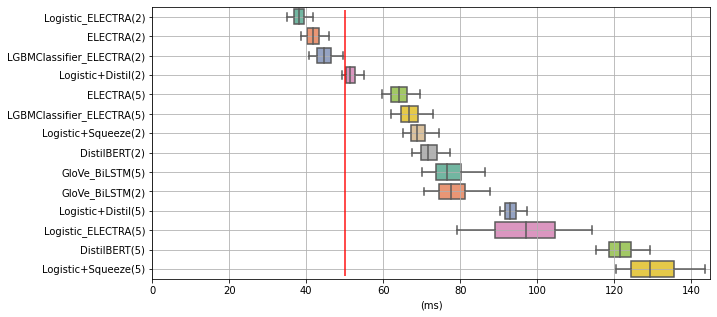

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(data=benchmark[benchmark.describe().iloc[1].sort_values().index]*1000, orient="h", palette="Set2")
plt.xlim(0,145)
plt.xlabel("(ms)")
x1, y1 = [50, 50], [-0.3,13.3]
plt.plot(x1,y1,c='r',linewidth=2,alpha=0.7)
plt.grid()
plt.show()

## table

<img src="https://cdn.scribbr.com/wp-content/uploads/2020/09/standard-deviation-in-normal-distributions.png">


In [ ]:
benchmark_mean = benchmark[benchmark.describe().iloc[1].sort_values().index].describe().iloc[1].apply(lambda x : str(round(x*1000,2)))
benchmark_std = benchmark[benchmark.describe().iloc[1].sort_values().index].describe().iloc[2].apply(lambda x : str(round((x*2000),1)))

In [ ]:
benchmark_std = pd.DataFrame(benchmark_mean + " ± " + benchmark_std + " ms",columns=['elapsed(95%)'])

In [ ]:
pd.concat([benchmark_mean,benchmark_std],axis=1)

,mean,std
Logistic_ELECTRA(2),38.16,3.4
ELECTRA(2),41.83,3.7
LGBMClassifier_ELECTRA(2),44.74,4.5
Logistic+Distil(2),51.53,2.9
ELECTRA(5),64.17,5.2
LGBMClassifier_ELECTRA(5),66.93,5.8
Logistic+Squeeze(2),69.05,4.7
DistilBERT(2),71.92,5.3
GloVe_BiLSTM(5),77.13,8.3
GloVe_BiLSTM(2),78.02,8.8


In [ ]:
benchmark_std

,elapsed(95%)
ELECTRA(2),39.07 ± 2.7 ms
Logistic_ELECTRA(2),40.57 ± 4.0 ms
LGBMClassifier_ELECTRA(2),41.35 ± 3.7 ms
Logistic+Distil(2),49.32 ± 3.4 ms
ELECTRA(5),58.64 ± 3.7 ms
Logistic+Squeeze(2),60.22 ± 6.6 ms
Logistic_ELECTRA(5),62.98 ± 5.4 ms
LGBMClassifier_ELECTRA(5),64.43 ± 5.1 ms
GloVe_BiLSTM(5),65.72 ± 12.9 ms
GloVe_BiLSTM(2),69.99 ± 7.9 ms


In [ ]:
benchmark_std.to_csv("fffff.csv")


In [ ]:
benchmark_std.to_csv("/content/drive/MyDrive/HateSpeech/PERFORMANCE2/Benchmarks_std.csv")

In [ ]:
import glob
llist = glob.glob("/content/drive/MyDrive/HateSpeech/PERFORMANCE2/*.csv")[:-2]
import pandas as pd
temp = pd.read_csv(llist[0])
for ll in llist[1:]:
  temp = pd.concat([temp,pd.read_csv(ll)])
temp = temp.iloc[:,1:]
temp = temp.sort_values('Val_Score(ROC_AUC)',ascending=False)
temp = temp.set_index('')

,Model,Train_Score(ACC),Train_Score(ROC_AUC),Train_Score(F1),Val_Score(ACC),Val_Score(ROC_AUC),Val_Score(F1),Test_Score(ACC),Test_Score(ROC_AUC),Test_Score(F1),Inference_Time
0,ELECTRA,0.955373,0.990415,0.955773,0.895223,0.960681,0.896048,0.364927,0.513311,0.390268,30.033314
0,DistilBERT,0.978999,0.997674,0.978798,0.883297,0.952547,0.879108,0.413393,0.514754,0.375996,28.073447
0,BiLSTM+GloVe(10),0.977136,0.998102,0.976885,0.868940,0.936699,0.864514,0.397043,0.517826,0.376616,8.134799
0,LogisticRegression_BERT_EMBED,0.842627,0.921017,0.845100,0.842371,0.920272,0.844208,0.360042,0.502175,0.383998,0.048613
0,LogisticRegression_SQUEEZE,0.842627,0.921017,0.845100,0.842371,0.920272,0.844208,0.360042,0.502175,0.383998,0.043455
2,LGBMClassifier_BERT_EMBED,0.855266,0.933154,0.857789,0.834887,0.915230,0.836876,0.379910,0.499551,0.382324,0.016189
2,LGBMClassifier_SQUEEZE,0.855266,0.933154,0.857789,0.834887,0.915230,0.836876,0.379910,0.499551,0.382324,0.014264
1,RandomForestClassifier_SQUEEZE,0.998932,0.999996,0.998949,0.823561,0.903191,0.824184,0.403882,0.499460,0.372661,0.123433
1,RandomForestClassifier_BERT_EMBED,0.998974,0.999996,0.998990,0.823527,0.903100,0.824437,0.405641,0.499277,0.376691,0.123162
1,LGBMClassifier_GloVe_EMBED,0.822096,0.904233,0.816286,0.794494,0.878974,0.781779,0.437235,0.484043,0.349130,0.107572


In [ ]:
llist

['/content/drive/MyDrive/HateSpeech/PERFORMANCE2/ELECTRA.csv',
 '/content/drive/MyDrive/HateSpeech/PERFORMANCE2/DistilBERT.csv',
 '/content/drive/MyDrive/HateSpeech/PERFORMANCE2/RoBERTa.csv',
 '/content/drive/MyDrive/HateSpeech/PERFORMANCE2/ML_BERT.csv',
 '/content/drive/MyDrive/HateSpeech/PERFORMANCE2/GloVe_BiLSTM.csv',
 '/content/drive/MyDrive/HateSpeech/PERFORMANCE2/ML_GloVe.csv',
 '/content/drive/MyDrive/HateSpeech/PERFORMANCE2/ML_SQUEEZE.csv',
 '/content/drive/MyDrive/HateSpeech/PERFORMANCE2/MobileBERT.csv']

In [ ]:
benchmark.mean()

Logistic+Squeeze(2)    0.060222
Logistic+Squeeze(5)    0.090284
Logistic+Distil(2)     0.049320
Logistic+Distil(5)     0.093169
ELECTRA(2)             0.039069
ELECTRA(5)             0.058642
DistilBERT(2)          0.070347
DistilBERT(5)          0.115618
GloVe_BiLSTM(2)        0.069989
GloVe_BiLSTM(5)        0.065716
dtype: float64